In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Part 1: Linear Interpolation

We use Python list mapping to generate the x-value mesh points, as well as the corresponding y values at the mesh points. 

We then use the function getLine that will calculate the slope and intercept of the line that goes through two points. When applied to each pair ((x0, y0), (x1, y1)) this function tells us the piecewise
function for that particular section. 

We then use matplotlib to graph the error function, sin(x) - l(x). This is graphed in a dotted line. We also graph the theoretical error te in a solid line. 

In [2]:
import math
#we generate the x values using a list
scale = math.pi/200
xs = list(map(lambda i: i * scale, range(0, 101))) 

#we then generate the corresponding y values of our function f (sin)
ys = list(map(math.sin, xs))

#each element of points is a coordinate, in a tuple representing (x0, y0) etc
points = list(zip(xs, ys))

 
def getLine(previous, current):
    # returns the slope and intercept of a linear interpolation of the given points
    # basically just connecting the dots
    x0 = previous[0]
    x1 = current[0]
    y0 = previous[1]
    y1 = current[1]
    slope = (y1 - y0) / (x1 - x0)
    intercept = y0 - (x0 * slope) 
    return [slope, intercept]

In [3]:
funcs = []
for previous, current in zip(points, points[1:]):
    funcs.append(getLine(previous, current))

#funcs should now store the slope-intercept coefficients
#each element of funcs represents the corresponding interpolation for the interval


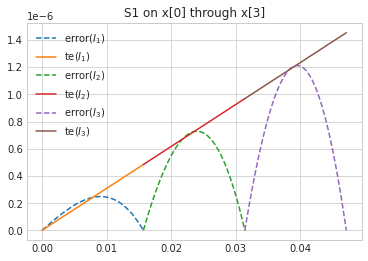

In [4]:
#now to graph the error and the theoretical error

fig = plt.figure()
ax = plt.axes()
x1 = np.linspace(xs[0], xs[1], 100)
x2 = np.linspace(xs[1], xs[2], 100)
x3 = np.linspace(xs[2], xs[3], 100)

combinedX = [x1, x2, x3]
zipped = list(zip(combinedX, funcs[0:3]))
labelnames = ['error($I_1$)', 'error($I_2$)', 'error($I_3$)']
tenames = ['te($I_1$)', 'te($I_2$)', 'te($I_3$)']
#what we want to do is open up each of the func values, then for 
for i, (xpiece, (slope, intercept)) in enumerate(zipped):
    ax.plot(xpiece, np.sin(xpiece) - (slope * xpiece + intercept), linestyle = 'dashed', label = labelnames[i])
    ax.plot(xpiece, np.sin(xpiece) * (scale ** 2) / 8, linestyle = 'solid', label = tenames[i])

plt.legend()
plt.title("S1 on x[0] through x[3]")
plt.show()

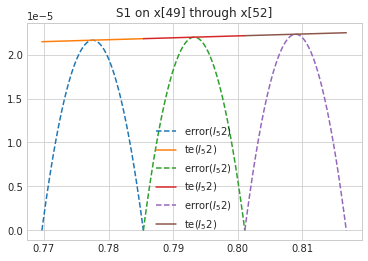

In [5]:
fig = plt.figure()
ax = plt.axes()
x4 = np.linspace(xs[49], xs[50], 100)
x5 = np.linspace(xs[50], xs[51], 100)
x6 = np.linspace(xs[51], xs[52], 100)

combinedX2 = [x4, x5, x6]
zipped2 = list(zip(combinedX2, funcs[49:52]))
labelnames = ['error($I_50$)', 'error($I_51$)', 'error($I_52$)']
tenames = ['te($I_50$)', 'te($I_51$)', 'te($I_52$)']
#what we want to do is open up each of the func values, then for 
for xpiece, (slope, intercept) in zipped2:
    ax.plot(xpiece, np.sin(xpiece) - (slope * xpiece + intercept), linestyle = 'dashed', label = labelnames[i])
    ax.plot(xpiece, np.sin(xpiece) * (scale ** 2) / 8, linestyle = 'solid', label = tenames[i])

plt.legend()
plt.title("S1 on x[49] through x[52]")
plt.show()

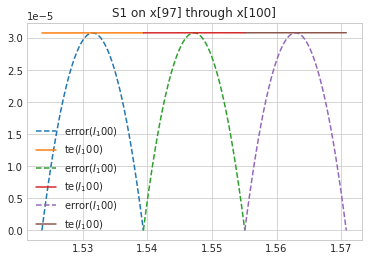

In [6]:
fig = plt.figure()
ax = plt.axes()
x7 = np.linspace(xs[97], xs[98], 100)
x8 = np.linspace(xs[98], xs[99], 100)
x9 = np.linspace(xs[99], xs[100], 100)

combinedX3 = [x7, x8, x9]
zipped3 = list(zip(combinedX3, funcs[97:100]))
labelnames = ['error($I_98$)', 'error($I_99$)', 'error($I_100$)']
tenames = ['te($I_98$)', 'te($I_99$)', 'te($I_100$)']
#what we want to do is open up each of the func values, then for 
for xpiece, (slope, intercept) in zipped3:
    ax.plot(xpiece, np.sin(xpiece) - (slope * xpiece + intercept), linestyle = 'dashed', label = labelnames[i])
    ax.plot(xpiece, np.sin(xpiece) * (scale ** 2) / 8, linestyle = 'solid', label = tenames[i])

plt.legend()
plt.title("S1 on x[97] through x[100]")
plt.show()

We can see that the error drops to zero at each of the mesh points. Because the portions of sin we are considering are strictly increasing (from 0 radians to pi/4 radians) the line estimates underestimate the function for each piece. We see that the errors near the theoretical estimate of error near the middle and then decrease. 

Part 2: Quadratic Interpolation

We do a very similar process to part 1. This time, we need to increase the number of mesh points to include midpoints 0, pi/400, pi/200, etc. We also need to adjust our formula for finding the interpolation to identify a quadratic formula of the form ax^2 + bx + c. The graphing process is similar, only needing to plug in the newer interpolations.

In [7]:
a = list(map(lambda i: i * scale, range(0, 101))) 

#we then generate the corresponding y values of our function f (sin)
b = list(map(math.sin, a))

#each element of points is a coordinate, in a tuple representing (x0, y0) etc
points = list(zip(a, b))
 
def getCurve(previous, current):
    # returns the FUNCTION that will be used to estimate the given chunk
    x0 = previous[0]
    x2 = current[0]
    y0 = previous[1]
    y2 = current[1]
    x1 = (x0 + x2) / 2
    y1 = math.sin(x1)
    #print(x1, y1)
    return lambda x: (y0 * (x - x1) * (x - x2) / ((x0 - x1) * (x0 - x2))) + (y1 * (x - x0) * (x - x2) / ((x1 - x0) * (x1 - x2))) + (y2 * (x - x1) * (x - x0) / ((x2 - x1) * (x2 - x0)))

curves = []
for previous, current in zip(points, points[1:]):
    curves.append(getCurve(previous, current))

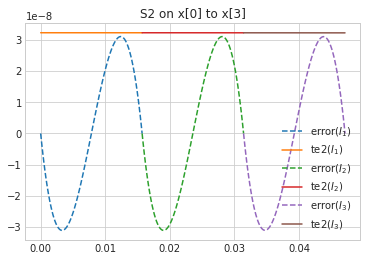

In [8]:
fig = plt.figure()
ax = plt.axes()
a1 = np.linspace(a[0], a[1], 100)
a2 = np.linspace(a[1], a[2], 100)
a3 = np.linspace(a[2], a[3], 100)

combinedA = [a1, a2, a3]
zipped = list(zip(combinedA, curves[0:3]))
labelnames = ['error($I_1$)', 'error($I_2$)', 'error($I_3$)']
tenames = ['te2($I_1$)', 'te2($I_2$)', 'te2($I_3$)']
#what we want to do is open up each of the func values, then for 
for i, (xpiece, funct) in enumerate(zipped):
    ax.plot(xpiece, np.sin(xpiece) - funct(xpiece), linestyle = 'dashed', label = labelnames[i])
    ax.plot(xpiece, np.cos(xpiece) * (scale ** 3) / 120, linestyle = 'solid', label = tenames[i])

plt.legend()
plt.title("S2 on x[0] to x[3]")
plt.show()

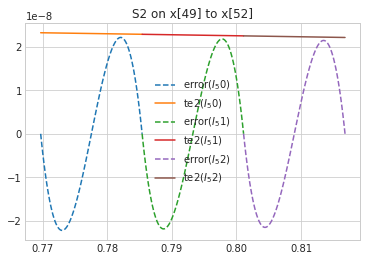

In [9]:
fig = plt.figure()
ax = plt.axes()
a4 = np.linspace(a[49], a[50], 100)
a5 = np.linspace(a[50], a[51], 100)
a6 = np.linspace(a[51], a[52], 100)

combinedA2 = [a4, a5, a6]
zipped2 = list(zip(combinedA2, curves[49:52]))
labelnames = ['error($I_50$)', 'error($I_51$)', 'error($I_52$)']
tenames = ['te2($I_50$)', 'te2($I_51$)', 'te2($I_52$)']
#what we want to do is open up each of the func values, then for 
for i, (xpiece, funct) in enumerate(zipped2):
    ax.plot(xpiece, np.sin(xpiece) - funct(xpiece), linestyle = 'dashed', label = labelnames[i])
    ax.plot(xpiece, np.cos(xpiece) * (scale ** 3) / 120, linestyle = 'solid', label = tenames[i])

plt.legend()
plt.title("S2 on x[49] to x[52]")
plt.show()

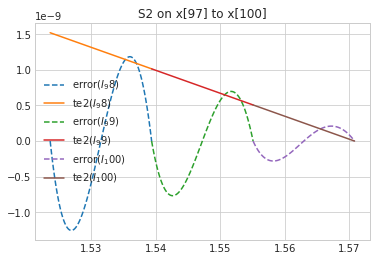

In [10]:
fig = plt.figure()
ax = plt.axes()
a7 = np.linspace(a[97], a[98], 100)
a8 = np.linspace(a[98], a[99], 100)
a9 = np.linspace(a[99], a[100], 100)

combinedA3 = [a7, a8, a9]
zipped3 = list(zip(combinedA3, curves[97:100]))
labelnames = ['error($I_98$)', 'error($I_99$)', 'error($I_100$)']
tenames = ['te2($I_98$)', 'te2($I_99$)', 'te2($I_100$)']
#what we want to do is open up each of the func values, then for 
for i, (xpiece, funct) in enumerate(zipped3):
    ax.plot(xpiece, np.sin(xpiece) - funct(xpiece), linestyle = 'dashed', label = labelnames[i])
    ax.plot(xpiece, np.cos(xpiece) * (scale ** 3) / 120, linestyle = 'solid', label = tenames[i])

plt.legend()
plt.title("S2 on x[97] to x[100]")
plt.show()